In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Question1

In [3]:
bk = pd.read_csv('./data_banknote_authentication.csv')
bk = bk.rename({'class':'Class'}, axis='columns')

color = []
for c in bk.Class:
    if c == 0:
        color.append('Green')
    else:
        color.append('red')

bk['Color'] = color

In [4]:
bk0 = bk[bk.Class == 0]
bk1 = bk[bk.Class == 1]
print(bk0.describe())
print()
print(bk1.describe())
print()
print(bk.describe())

         variance    skewness    curtosis     entropy  Class
count  762.000000  762.000000  762.000000  762.000000  762.0
mean     2.276686    4.256627    0.796718   -1.147640    0.0
std      2.019348    5.138792    3.239894    2.125077    0.0
min     -4.285900   -6.932100   -4.941700   -8.548200    0.0
25%      0.883345    0.450063   -1.709700   -2.228250    0.0
50%      2.553100    5.668800    0.700605   -0.552380    0.0
75%      3.884450    8.691975    2.652925    0.423257    0.0
max      6.824800   12.951600    8.829400    2.449500    0.0

         variance    skewness    curtosis     entropy  Class
count  610.000000  610.000000  610.000000  610.000000  610.0
mean    -1.868443   -0.993576    2.148271   -1.246641    1.0
std      1.881183    5.404884    5.261811    2.070984    0.0
min     -7.042100  -13.773100   -5.286100   -7.588700    1.0
25%     -3.061450   -5.810025   -1.357500   -2.458375    1.0
50%     -1.806100    0.172775    0.373720   -0.661650    1.0
75%     -0.541770    3.

# Question2

Text(0.5, 0.98, 'class 1')

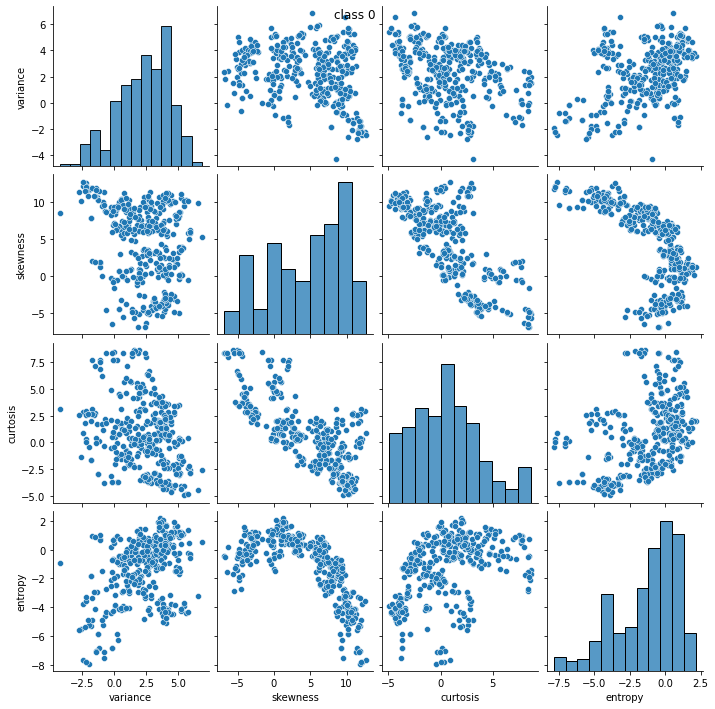

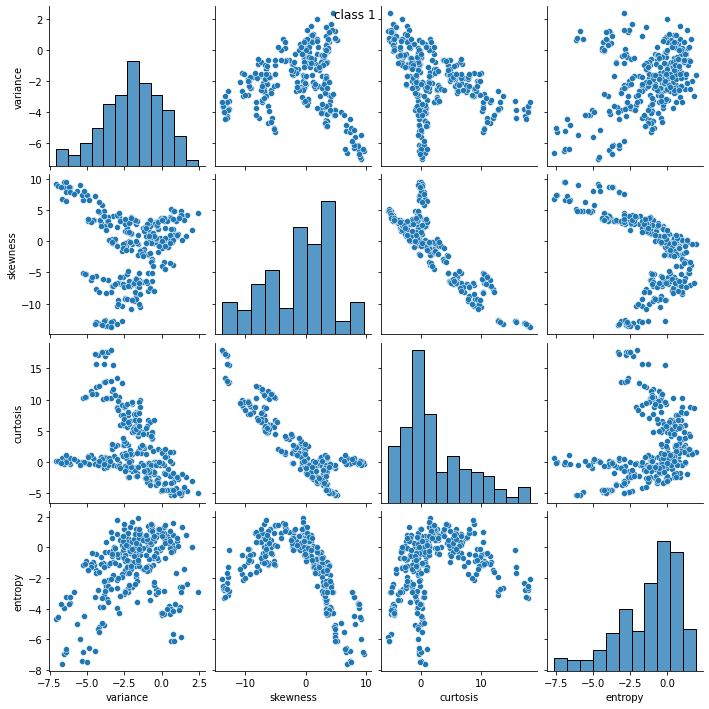

In [5]:
# Split data and pairplot

## bk0
x0 = bk0[['variance', 'skewness', 'curtosis', 'entropy']]
y0 = bk0[['Class']]
x0Train, x0Test, y0Train, y0Test = train_test_split(x0, y0, test_size=0.5, random_state=0)

f0 = sns.pairplot(x0Train)
f0.fig.suptitle("class 0")

## bk1
x1 = bk1[['variance', 'skewness', 'curtosis', 'entropy']]
y1 = bk1[['Class']]
x1Train, x1Test, y1Train, y1Test = train_test_split(x1, y1, test_size=0.5, random_state=0)

f1 = sns.pairplot(x1Train)
f1.fig.suptitle("class 1")

Text(0.5, 1.0, 'entropy')

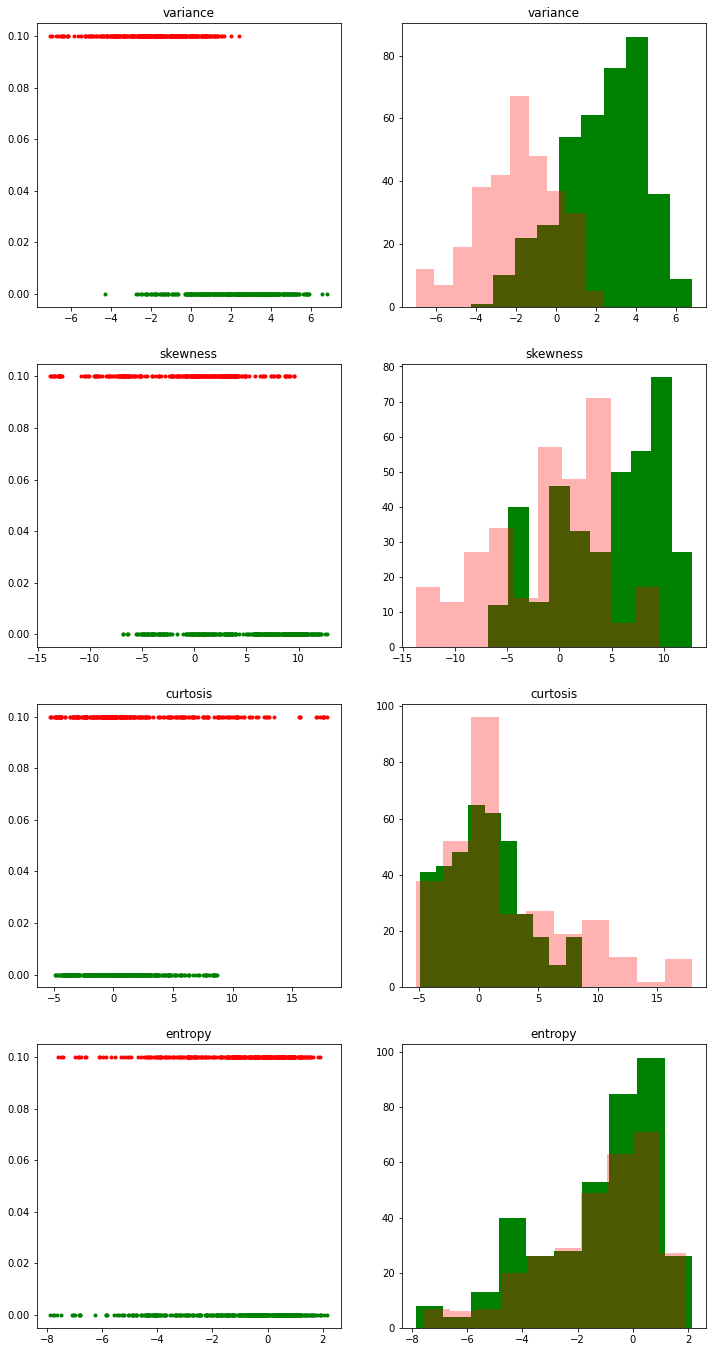

In [6]:
# easy model
f = plt.figure()
f.set_size_inches(12,24)

## variance
va = f.add_subplot(4,2,1)
a0 = x0Train.variance
a1 = x1Train.variance
va.plot(a0, np.zeros_like(a0) + 0, '.', color = 'green')
va.plot(a1, np.zeros_like(a1) + 0.1, '.', color = 'red')
va.set_title('variance')

vah = f.add_subplot(4,2,2)
vah.hist(a0, color='green')
vah.hist(a1, color = 'red', alpha=0.3)
vah.set_title('variance')

## skewness   
sk = f.add_subplot(4,2,3)
a0 = x0Train.skewness
a1 = x1Train.skewness
sk.plot(a0, np.zeros_like(a0) + 0, '.', color = 'green')
sk.plot(a1, np.zeros_like(a1) + 0.1, '.', color = 'red')
sk.set_title('skewness')

skh = f.add_subplot(4,2,4)
skh.hist(a0, color='green')
skh.hist(a1, color = 'red', alpha=0.3)
skh.set_title('skewness')

## curtosis    
cu = f.add_subplot(4,2,5)
a0 = x0Train.curtosis
a1 = x1Train.curtosis
cu.plot(a0, np.zeros_like(a0) + 0, '.', color = 'green')
cu.plot(a1, np.zeros_like(a1) + 0.1, '.', color = 'red')
cu.set_title('curtosis')

cuh = f.add_subplot(4,2,6)
cuh.hist(a0, color='green')
cuh.hist(a1, color = 'red', alpha=0.3)
cuh.set_title('curtosis')

## entropy   
en = f.add_subplot(4,2,7)
a0 = x0Train.entropy
a1 = x1Train.entropy
en.plot(a0, np.zeros_like(a0) + 0, '.', color = 'green')
en.plot(a1, np.zeros_like(a1) + 0.1, '.', color = 'red')
en.set_title('entropy')

enh = f.add_subplot(4,2,8)
enh.hist(a0, color='green')
enh.hist(a1, color = 'red', alpha=0.3)
enh.set_title('entropy')




In [1]:
# Predict lable
x = bk[['variance', 'skewness', 'curtosis', 'entropy']]
y = bk[['Class']]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.5, random_state=0)

yPredict = []
for v in xTest.variance:
    if v >= 0 :
        yPredict.append(0)
    else:
        yPredict.append(1)

# True False
tp = 0
tn = 0
fp = 0
fn = 0
acc = 0
for (p, t) in zip(yPredict, yTest.Class):
    if p == 0 and t == 0:
        tp += 1
    elif p == 1 and t == 1:
        tn += 1
    elif p == 0 and t == 1:
        fp += 1
    elif p == 1 and t == 0:
        fn += 1
    
    if p == t:
        acc = acc + 1

print("TP:{} FP:{} TN:{} FN:{} TPR:{} TNR:{} Accuracy:{}".format(tp, fp, tn, fn, tp/(tp + fn), tn/(tn + fp), acc / len(yPredict)))

## Confusion Matrix I choose 
# 0 is good 1 is bad
temp = confusion_matrix(yTest, yPredict)
print(temp)

tn = temp[0][0]
fn = temp[1][0]
tp = temp[1][1]
fp = temp[0][1]

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print('TPR = {}, TNR = {}, tp fp tn fn = {} {} {} {}'.format(tpr, tnr, tp, fp, tn, fn))


NameError: name 'bk' is not defined

# Qestion3

[0.9985422740524781, 0.9985422740524781, 1.0, 0.9941690962099126, 0.9941690962099126]


C:\Users\Lee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

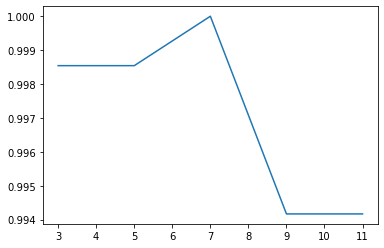

In [18]:
# KNN
kList = [3,5,7,9,11]
accuracy = []
for k in kList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xTrain, yTrain)
    yPredict = knn.predict(xTest)
    accuracy.append(accuracy_score(yTest, yPredict))
   
plt.plot(kList, accuracy)
print(accuracy)

In [19]:
# k = 7 is optimal
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xTrain, yTrain)
yPredict = knn.predict(xTest)
# True False
tp = 0
tn = 0
fp = 0
fn = 0
acc = 0
for (p, t) in zip(yPredict, yTest.Class):
    if p == 0 and t == 0:
        tp += 1
    elif p == 1 and t == 1:
        tn += 1
    elif p == 0 and t == 1:
        fp += 1
    elif p == 1 and t == 0:
        fn += 1
    
    if p == t:
        acc = acc + 1

print("TP:{} FP:{} TN:{} FN:{} TPR:{} TNR:{} Accuracy:{}".format(tp, fp, tn, fn, tp/(tp + fn), tn/(tn + fp), acc / len(yPredict)))



TP:385 FP:0 TN:301 FN:0 TPR:1.0 TNR:1.0 Accuracy:1.0


C:\Users\Lee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
# BU ID 64501194
# Take 1 1 9 4
x = {'variance':[1], 'skewness':[1], 'curtosis':[9], 'entropy':[4]}
x = pd.DataFrame.from_dict(x)
## my simple classifier
yPredict = 1
print("my simple classifier: {}".format(yPredict))
## for best knn
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xTrain, yTrain)
yPredict = knn.predict(x)
print("knn(n=7): {}".format(yPredict))




my simple classifier: 1
knn(n=7): [0]


C:\Users\Lee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
